In [6]:
import random
import matplotlib.pyplot as plt
import nest
import numpy as np
from run_single_simulation import run_single_simulation
from visualization import plot_diff_matrix
from mean_and_entropy import calculate_mean
from mean_and_entropy import calculate_entropy

In [2]:
# Initialize Exc->Exc weight matrix (10×10), diagonal=0, non-diagonal=0.1
init_w_matrix = np.ones((10, 10)) * 0.1
init_w_matrix -= np.identity(10) * 0.1


Oct 25 23:19:18 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.05 ms.
>>> 开始【训练阶段】(10000 ms), 当前 rate=40
Oct 25 23:19:18 NodeManager::prepare_nodes [Info]: 
    Preparing 1018 nodes for simulation.

Oct 25 23:19:18 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 1018
    Simulation time (ms): 500
    Number of OpenMP threads: 1
    Not using MPI

Oct 25 23:19:19 SimulationManager::run [Info]: 
    Simulation finished.


Oct 25 23:19:19 NodeManager::prepare_nodes [Info]: 
    Preparing 1018 nodes for simulation.

Oct 25 23:19:19 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 1018
    Simulation time (ms): 100
    Number of OpenMP threads: 1
    Not using MPI

Oct 25 23:19:19 SimulationManager::run [Info]: 
    Simulation finished.

Oct 25 23:19:19 NodeManager::prepare_nodes [Info]: 
    Preparing 1018 nodes for simulation.

Oct 25 23:19:19 SimulationManager::start_updating_ [Info]: 
    Number of local

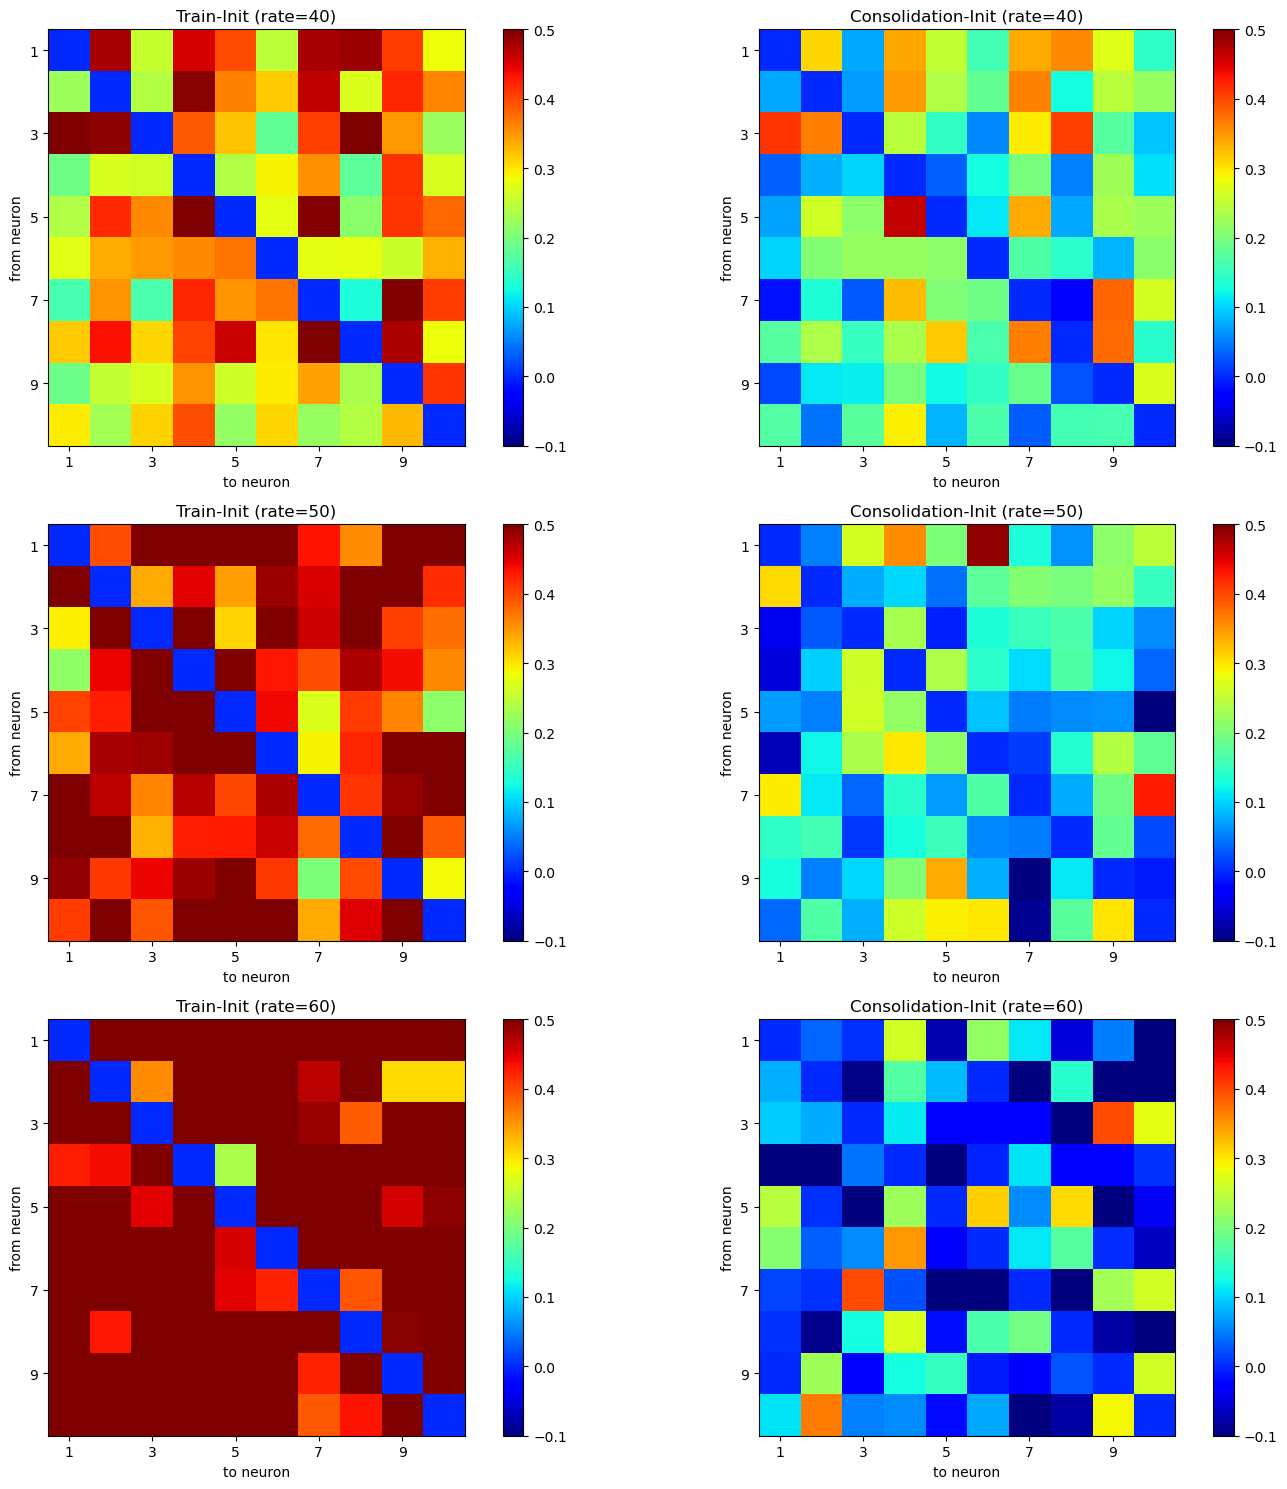

In [3]:
# Main loop: Use different rates to perform independent simulations in sequence
rates_to_run = [40, 50, 60]

fig, axes = plt.subplots(len(rates_to_run), 2, figsize=(15, 15))

weight_encodings = []
weight_consolidations = []
#weight_recallings = []

for row_idx, r_val in enumerate(rates_to_run):
    # run single simulation
    w_enc, w_cons = run_single_simulation(r_val)

    weight_encodings.append(w_enc)
    weight_consolidations.append(w_cons)
    #weight_recallings.append(w_recall)

    # Draw the difference matrix (Train-Init, Cons-Init, Recall-Init)
    ax_train = axes[row_idx, 0]
    ax_cons = axes[row_idx, 1]
    #ax_recall = axes[row_idx, 2]

    plot_diff_matrix(ax_train, w_enc, init_w_matrix, title_str=f"Train-Init (rate={r_val})")
    plot_diff_matrix(ax_cons, w_cons, init_w_matrix, title_str=f"Consolidation-Init (rate={r_val})")
    #plot_diff_matrix(ax_recall, w_recall, init_w_matrix, title_str=f"Recall-Init (rate={r_val})")

plt.tight_layout()
plt.show()

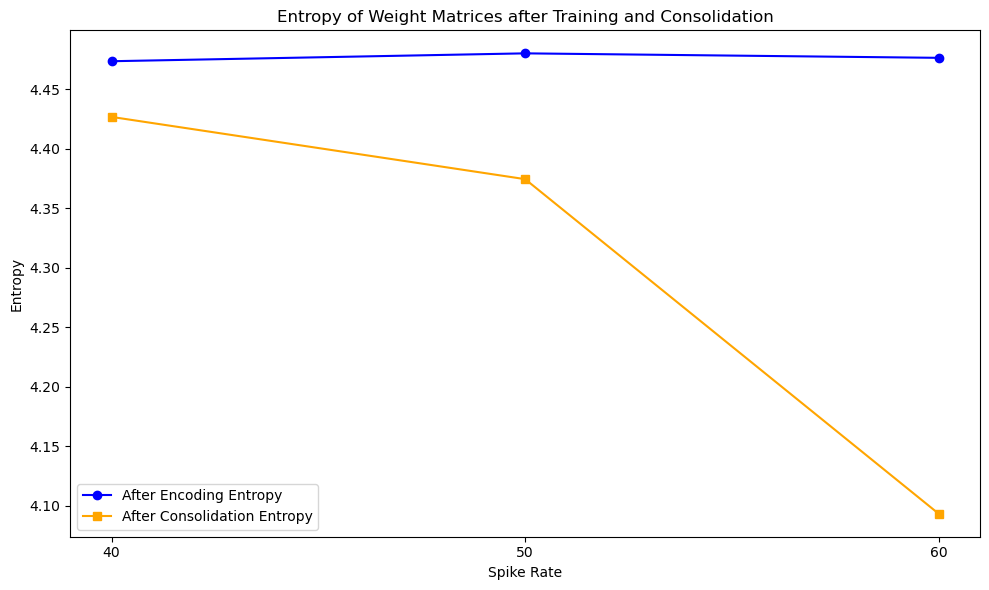

In [4]:
# entropy
entropy_encodings = []
entropy_consolidations = []

for i in range(len(rates_to_run)):
    entropy_enc = calculate_entropy(weight_encodings[i])
    entropy_cons = calculate_entropy(weight_consolidations[i])

    entropy_encodings.append(entropy_enc)
    entropy_consolidations.append(entropy_cons)

plt.figure(figsize=(10, 6))
plt.plot(rates_to_run, entropy_encodings, marker='o', label='After Encoding Entropy', color='blue')
plt.plot(rates_to_run, entropy_consolidations, marker='s', label='After Consolidation Entropy', color='orange')

plt.title('Entropy of Weight Matrices after Training and Consolidation')
plt.xlabel('Spike Rate')
plt.ylabel('Entropy')
plt.xticks(rates_to_run)
plt.legend()
#plt.grid()
plt.tight_layout()
plt.show()

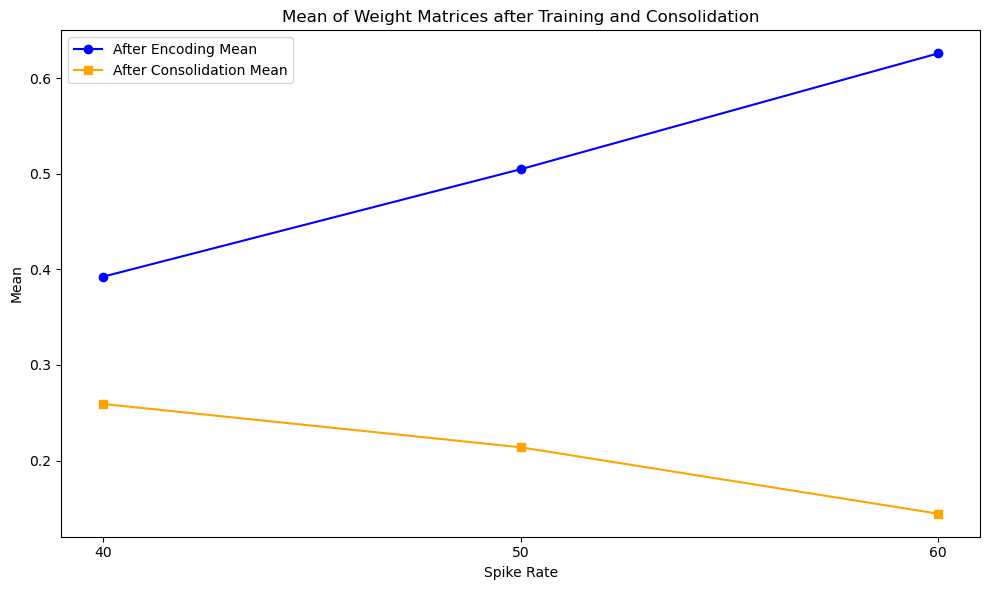

In [5]:
# mean
mean_encodings = []
mean_consolidations = []

for i in range(len(rates_to_run)):
    mean_enc = calculate_mean(weight_encodings[i])
    mean_cons = calculate_mean(weight_consolidations[i])

    mean_encodings.append(mean_enc)
    mean_consolidations.append(mean_cons)
plt.figure(figsize=(10, 6))
plt.plot(rates_to_run, mean_encodings, marker='o', label='After Encoding Mean', color='blue')
plt.plot(rates_to_run, mean_consolidations, marker='s', label='After Consolidation Mean', color='orange')
plt.title('Mean of Weight Matrices after Training and Consolidation')
plt.xlabel('Spike Rate')
plt.ylabel('Mean')
plt.xticks(rates_to_run)
plt.legend()
#plt.grid()
plt.tight_layout()
plt.show()